In [2]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex


Total count for 00 and 11 are: {'00': 476, '01': 524}


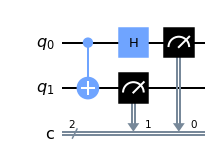

In [11]:
simulator=QasmSimulator()
circuit = QuantumCircuit(2, 2) 
#ordem das matrizes sao importantes
circuit.cx(0,1) # 0 is the control and 1 is the target
circuit.h(0) # 0 refers to the first particle
circuit.measure([0,1], [0,1]) # 01 is control and 01 is target
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000) #throw le particles
result = job.result() #results
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)
circuit.draw('mpl')

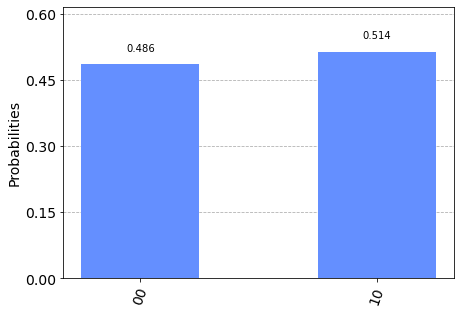

In [6]:
plot_histogram(counts)

In [5]:
circuit1 = QuantumCircuit(3, 3)
circuit1.h(0)
circuit1.cx(0,1)
circuit1.cx(0,2)
circuit1.draw('mpl')

VisualizationError: 'Invalid output type sphere selected. The only valid choices are text, latex, latex_source, and mpl'

In [9]:
state = Statevector.from_int(0, 2**3) #000 001 011 110 101 111 100 010 
state=state.evolve(circuit1)
state.draw('latex')

<IPython.core.display.Latex object>

In [11]:
array_to_latex(state)

<IPython.core.display.Latex object>

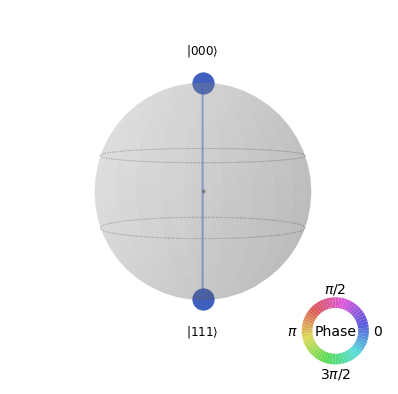

In [12]:
state.draw('qsphere')